# Import external and internal modules

In [4]:
%matplotlib inline
import numpy as np
import importlib
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap

In [5]:
import modules
importlib.reload(modules)
importlib.reload(modules.utils)
from modules import *

# Read grid data

In [13]:
lat_csv = 'data/latitude_EASE.csv'
lon_csv = 'data/longitude_EASE.csv'
grid = generate_ease_grid(lat_csv, lon_csv)
print(grid.shape)

(361, 361, 2)


# Draw the EASE grid on map

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


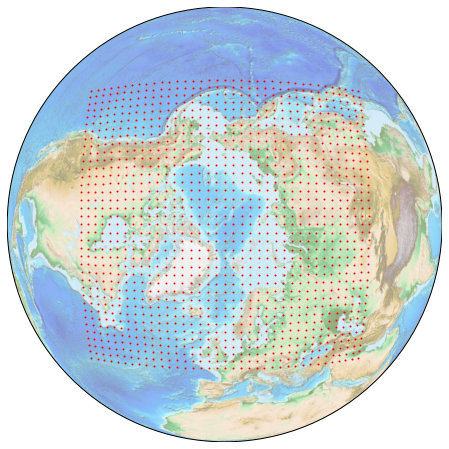

In [7]:
# earth view
fig = plt.figure(figsize=(8, 8), edgecolor='w')
draw_map([], [], grid, fig, projection='ortho')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


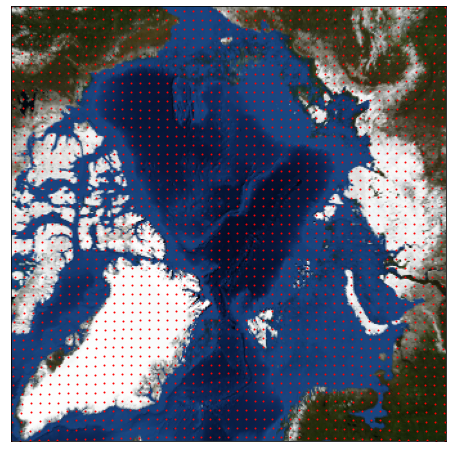

In [8]:
# zoomed view
fig = plt.figure(figsize=(8, 8), edgecolor='w')
draw_map([], [], grid, fig, projection='stere', grid_res=4, width=5000000, height=5000000)

# convert cartesian coordinates of buoys on the EASE grid to latitude and longitude

In [18]:
x_EASE = 2.3
y_EASE = 4.2
lat,lon = interpolate_coordinate(x_EASE, y_EASE, grid)
print(lat,lon)

31.052952 -135.356344


# Read the sea ice dataset

# Visualize the dataset